## Regression and Bias-Variance Trade-off Problems

In this lab, we will focus on **regression** using the `sklearn` module and explore the concept of the **bias-variance trade-off**.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
%matplotlib inline

### The Diabetes Dataset

In this example, we will use the [Diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html), a classic dataset for regression tasks.

It contains:
- **9 numerical input features**, including age, BMI, blood pressure, and various blood serum measurements.
- A **numerical response variable** representing a quantitative measure of disease progression one year after baseline.

Our goal:  
Use the features — especially **blood glucose level** — to **predict the progression of diabetes**.

In [2]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 9] # input features
y = diabetes.target # response
diabetes.data.shape

(442, 10)

First, we will fit the data by a linear regression model using the `LinearRegression` model from `sklearn.linear_model`.

When using prediction models in `sklearn`, we utilize two methods, `fit` and `predict`. As the names suggests,  the `fit` method is used to fit the model, e.g., to find parameters of the model. In this case, the `fit` will calculate the coefficients of the regression.

To see how well the model performed the predictions, we will visualize the *fitted* vs *real* values. In case of a perfect fit, the points would all lie at a line.

Linear model coefficients:  [619.22282068]


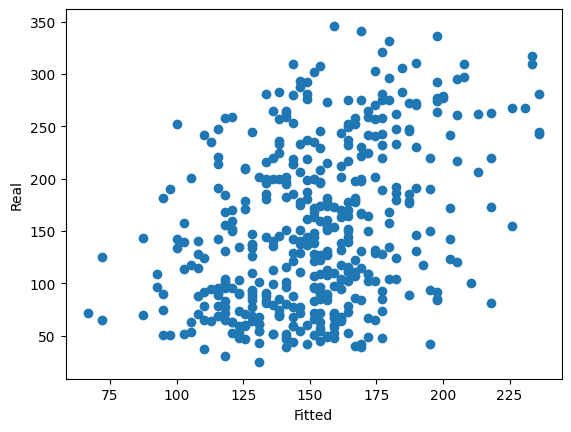

In [3]:
linear_regression_model = LinearRegression().fit(X, y)
fitted = linear_regression_model.predict(X)

# prints coefficients
print('Linear model coefficients: ', linear_regression_model.coef_)

plt.scatter(fitted, y)
plt.xlabel("Fitted")
_ = plt.ylabel("Real")

### Train-Test Split and Baseline Models

To avoid **overfitting**, we divide the dataset into a **training set** and a **test set** using the `train_test_split` method from `sklearn.model_selection`.

This method takes:
- The **feature matrix** and **response vector** as inputs.
- The `random_state` parameter to ensure reproducibility of the split.

---

Next, we perform **dummy predictions** using two models:

1. **Dummy Regressor**  
   This model predicts the **mean value** of the training responses.  
   It serves as a **benchmark** — if your model performs worse than this, it’s a sign of poor fit.

2. **Linear Regression Model**  
   Fit the model to the training data and use it to predict the test data.

In the cell below, complete the following steps:
- Fit the `LinearRegression` model to the training data.
- Predict the test data using `.predict()` method.

In [ ]:
from sklearn.dummy import DummyRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fits a DummyRegressor with mean of the training data
dummy_mean = DummyRegressor(strategy="mean").fit(X_train, y_train)
# predict y using thest data
y_test_dummy_mean = dummy_mean.predict(X_test)

# fit a linear regression model
lr_model =LinearRegression().fit(X_train, y_train)
# predict with linear regresion based on the test data
y_test_lr = lr_model.predict(X_test)

### KNN Regression

Regression can also be performed using the **K-Nearest Neighbors (KNN)** algorithm.

In **KNN regression**, the predicted value for a new observation is computed as the **average of the responses** of its **K nearest neighbors** in the training data.

- The number of neighbors, **K**, is a user-defined **hyperparameter**.
- A smaller K may lead to high variance (overfitting), while a larger K may increase bias (underfitting).

---

Your task:  
Use the `KNeighborsRegressor` class from `sklearn.neighbors` with `n_neighbors=5` to:
1. Fit the model on the training data.
2. Predict the responses for the test set.
3. Store the predictions in the variable `y_test_knn`.

In [7]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_regr = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
# fit KNeighborsRegressor
y_test_knn = knn_regr.predict(X_test)

### Error Measures for Regression

As the first step, let's finish the function that calculates the **Mean Squared Error (MSE)** using the **dot product of the residuals**.

The MSE formula is:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Instead of using a loop or `np.sum`, we can compute it efficiently using the dot product of the residual vector with itself.

Complete the function below to return the MSE as a scalar.

In [8]:
# MSE calculation
def MSE(y_real, y_fitted):
  # you can raise an exception if the vectors have a different length
  if y_real.shape != y_fitted.shape:
    raise Exception("The dimensions do not match")
  # residual
  resid = y_real - y_fitted
  # compute MSE with dot product
  MSE = resid.T @ resid / resid.shape[0]
  return MSE.item() # the item extracts first item of np array as a scalar, as the dot product shall return an array in this case

This cell verifies the custom implementation of the Mean Squared Error (MSE) against the function `mean_squared_error` from `sklearn`.

In [9]:
y_real = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y_est = np.array([1,2,4,6,6,6,4,8]).reshape(-1,1)

print(f"Custom MSE: {MSE(y_real, y_est)}")
print(f"Sklearn MSE: {mean_squared_error(y_real, y_est)}")

Custom MSE: 1.875
Sklearn MSE: 1.875


Next, we compare the training and test Mean Squared Error (MSE) for the three models trained above. This allows us to evaluate which model provides the best fit to the data.

Steps to complete:

1. Estimate the training error for the KNN model by predicting on the training set.  
2. Compute the MSE for the KNN predictions and compare it with the Dummy and Linear Regression models.



In [ ]:
y_train_lr = lr_model.predict(X_train)
y_train_dummy = dummy_mean.predict(X_train)
y_train_knn = knn_regr.predict(X_train)

mse_dummy_train = MSE(y_train, y_train_dummy)
print(f"Dummy MSE: {mse_dummy_train:.2f}")

mse_lr_train = MSE(y_train, y_train_lr)
print(f"Linear model MSE: {mse_lr_train:.2f}")

# add code computing and printing MSE for KNN
mse_knn_train =  MSE(y_train, y_train_knn)
print(f"KNN MSE: {mse_knn_train:.2f}")

Dummy MSE: 6253.47
Linear model MSE: 5335.95
KNN MSE: 4917.71


We can examine the test data to determine which model provides the best fit.  
The linear regression model achieves only about 14% improvement compared to the Dummy regressor (mean) in terms of Mean Squared Error (MSE).  

This indicates that the relationship between output and input data is relatively weak, and the linear model does not capture much additional predictive power beyond the simple mean baseline.

Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4248.26
Mean squared error (knn): 4717.65


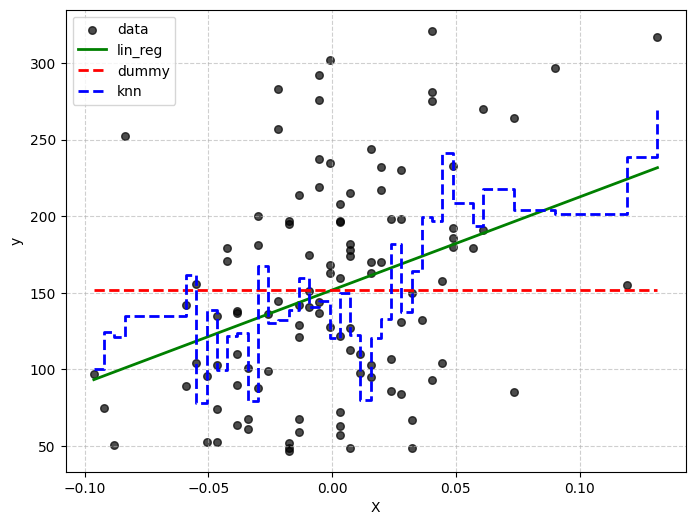

In [12]:
print(f"Mean squared error (dummy): {mean_squared_error(y_test, y_test_dummy_mean):.2f}")
print(f"Mean squared error (linear model): {mean_squared_error(y_test, y_test_lr):.2f}")
print(f"Mean squared error (knn): {mean_squared_error(y_test, y_test_knn):.2f}")

# sort the values
sort_idx = np.argsort(X_test.ravel())
X_test_sorted = X_test[sort_idx]
y_test_sorted = y_test[sort_idx]
y_test_lr_sorted = y_test_lr[sort_idx]
y_test_dummy_sorted = y_test_dummy_mean[sort_idx]
y_test_knn_sorted = y_test_knn[sort_idx]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='black', s=30, alpha=0.7, label='data')

plt.plot(X_test_sorted, y_test_lr_sorted, color='green', linewidth=2, label='lin_reg')
plt.plot(X_test_sorted, y_test_dummy_sorted, color='red', linestyle='dashed',
         linewidth=2, label='dummy')
plt.plot(X_test_sorted, y_test_knn_sorted, color='blue', linestyle='dashed',
         linewidth=2, drawstyle='steps-post', label='knn')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Bias-variance tradeoff

In this example, we examine a simple case of overfitting.  
We generate data based on the function $\sin(x)$ and add Gaussian noise to simulate variability:

$$
y = \sin(x) + 0.2x + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 0.04).
$$

This noisy dataset will be used to demonstrate how polynomial models of different degrees can either underfit or overfit the data.

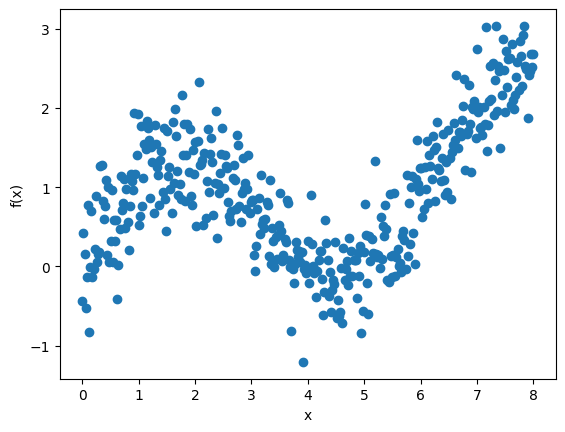

In [13]:
np.random.seed(123)
n = 400
# creates a uniform sequence of n values between 0 and 8 (inclusive)
x = np.linspace(0, 8, n)
y = np.sin(x) + np.random.normal(0,0.4, n) + 0.2*x
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

To fit the data points, we will use polynomials of different degrees.  
This approach can be seen as a form of embedding, as discussed in the lectures.  

The higher the degree of the polynomial, the more flexible the fitted curve becomes.  
While lower-degree polynomials may underfit the data, very high-degree polynomials can lead to overfitting.  

In addition to the 5th-degree polynomial shown below, fit polynomials of degree 30 and 100:

$$
p_d(x) = \sum_{i=0}^{d} a_i x^i
$$

where $d$ is the degree of the polynomial and $a_i$ are the fitted coefficients.

In [17]:
# fits a 5th degree polynomial
p5 = np.poly1d(np.polyfit(x, y, deg=5))

# in a similar fashion fit a polynomial with 30th and 100th degree
p30 = np.poly1d(np.polyfit(x, y, deg=30))
p100 = np.poly1d(np.polyfit(x, y, deg=100))

C:\Users\chech\AppData\Local\Temp\ipykernel_20248\787867522.py:5: RankWarning: Polyfit may be poorly conditioned
  p30 = np.poly1d(np.polyfit(x, y, deg=30))
C:\Users\chech\AppData\Local\Temp\ipykernel_20248\787867522.py:6: RankWarning: Polyfit may be poorly conditioned
  p100 = np.poly1d(np.polyfit(x, y, deg=100))


In the visualization below, all polynomial models appear to fit the data reasonably well.  

However, when zooming in on the right portion of the plot, we observe that the higher-degree polynomial (red dashed line) shows excessive flexibility. This behavior is a clear indication of **overfitting**, where the model adapts too closely to the noise in the data rather than capturing the underlying trend.

On the zoomed plot, observe the high flexibility of the $100$-th degree polynomial.  

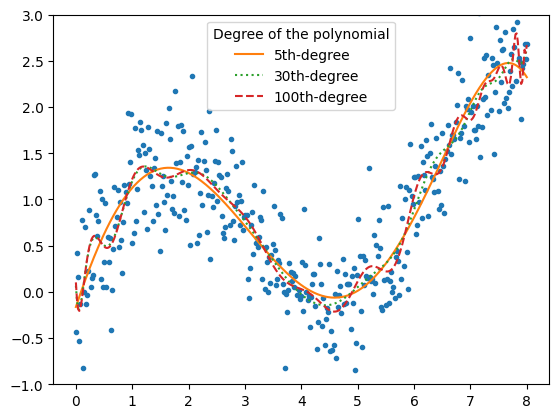

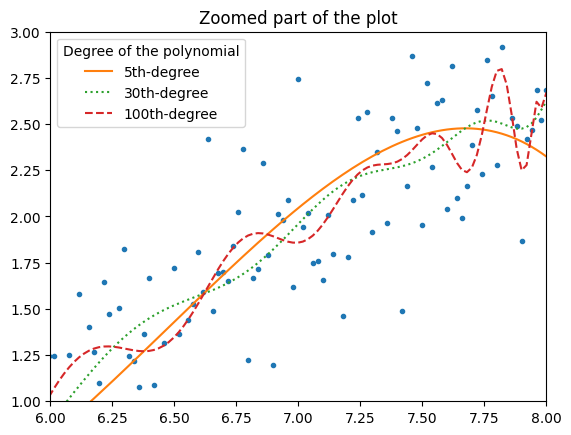

In [18]:
_ = plt.plot(x, y, '.')
plt.plot(x, p5(x), '-', label = '5th-degree')
plt.plot(x, p30(x), ':', label = '30th-degree')
plt.plot( x, p100(x),'--', label = '100th-degree')
plt.legend(title="Degree of the polynomial")
plt.ylim(-1,3)
plt.show()

_ = plt.plot(x, y, '.')
plt.title("Zoomed part of the plot")
plt.plot(x, p5(x), '-', label = '5th-degree')
plt.plot(x, p30(x), ':', label = '30th-degree')
plt.plot( x, p100(x),'--', label = '100th-degree')
plt.legend(title="Degree of the polynomial")
plt.ylim(1,3) # y limits to be zoomed
plt.xlim(6,8) # x limits to be zoomed
plt.show()

## Training and Test Set Data Splitting

What degree of polynomial should be chosen for this fit?  
Above, we observed polynomial fits with three different degrees. To determine the most appropriate degree, we can select several polynomial degrees, fit them on the training data, and then evaluate their performance on the test data.

In the cell below, split the dataset into training and test sets using:

- `test_size = 0.25`  
- `random_state = 0`

This ensures that 25% of the data is reserved for testing, while 75% is used for training, with reproducibility guaranteed by the fixed random state.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(300,) (300,)
(100,) (100,)


Next, add the calculation of the test MSE for each polynomial degree, and print the train and test MSE.

In [20]:
import warnings
# to ignore the warnings about high rank of polynomials
warnings.simplefilter('ignore', np.exceptions.RankWarning)

# polynomial degrees
poly_degrees = [5, 7, 9, 11, 20, 30, 40, 50, 60, 80, 100]

poly_list = [np.poly1d(np.polyfit(x_train, y_train, i)) for i in poly_degrees]


train_MSE = [round(MSE(p(x_train), y_train), 3) for p in poly_list]
# calculate MSE on the test set using list comprehensions
test_MSE = [round(MSE(p(x_test), y_test), 3) for p in poly_list]

for i,j,k in zip(poly_degrees, train_MSE, test_MSE):
  print(f"p:{i:4d}, train MSE: {j:.3f}, test MSE: {k:.3f}")

p:   5, train MSE: 0.164, test MSE: 0.151
p:   7, train MSE: 0.161, test MSE: 0.144
p:   9, train MSE: 0.161, test MSE: 0.145
p:  11, train MSE: 0.161, test MSE: 0.146
p:  20, train MSE: 0.155, test MSE: 0.148
p:  30, train MSE: 0.154, test MSE: 0.150
p:  40, train MSE: 0.147, test MSE: 0.171
p:  50, train MSE: 0.146, test MSE: 0.162
p:  60, train MSE: 0.145, test MSE: 0.177
p:  80, train MSE: 0.144, test MSE: 0.249
p: 100, train MSE: 0.144, test MSE: 0.348


Plot the test MSE values alongside the training MSE values to visualize how model performance changes with increasing polynomial degree.

By inspecting the plot, you can identify the point at which the model begins to **overfit**.  

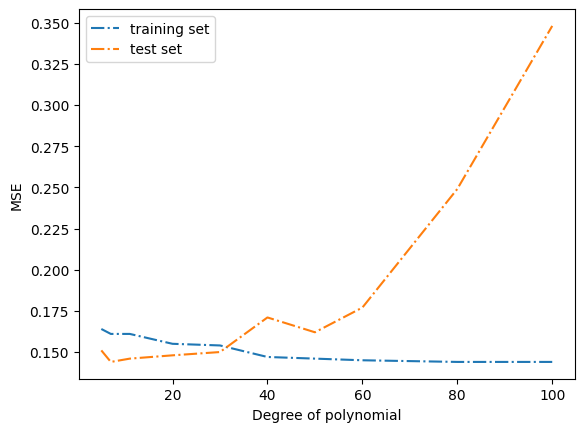

In [21]:
plt.plot(poly_degrees, train_MSE, "-.", label = 'training set')
# add the test mse to the plot using plt.plot()
plt.plot(poly_degrees, test_MSE, "-.", label = 'test set')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
_ = plt.legend()

As observed in the plot, the training and test MSE curves intersect around the 30th-degree polynomial.  

In the cell below, print which polynomial degrees lead to underfitting and which lead to overfitting based on the MSE values.

In [ ]:
print("<30 is underfitting and >30 is overfitting ")

This indicates a transition point in model behavior:

- **Underfitting** typically occurs at **low polynomial degrees** (e.g., 5, 7, 9), where the model is too simple to capture the underlying pattern in the data.
- **Overfitting** becomes evident at **high polynomial degrees** (e.g., 40, 50, 60, 80, 100), where the model is excessively flexible and starts fitting noise in the training data.

### Fitting a KNN Model

Now, fit the data using the K-Nearest Neighbors (KNN) regression method for varying values of $k$.  
Try values such as $k \in \{2, 3, 5, 7, 9, 11, 20, 30\}$ to observe how the number of neighbors affects the model's flexibility and generalization.

Tasks to complete:

1. Create a list of $k$ values to test.  
2. For each $k$, fit a KNN model and estimate predictions on the test data.  
3. Compute and append the test MSE to the `mse_test_list`.  
4. Plot the test MSE against the corresponding $k$ values to visualize the bias-variance trade-off.

Train MSE: [0.07 0.11 0.12 0.14 0.15 0.15 0.16 0.17]
Test MSE: [0.23 0.22 0.18 0.16 0.15 0.16 0.15 0.15]


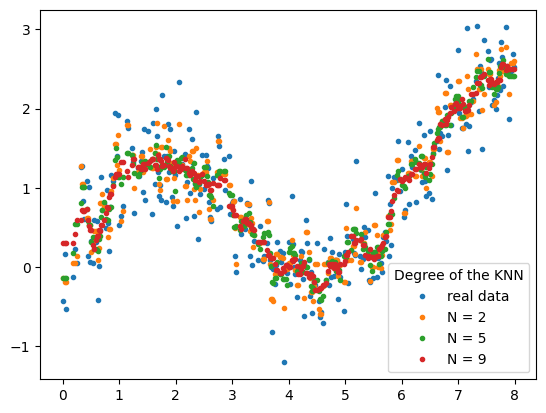

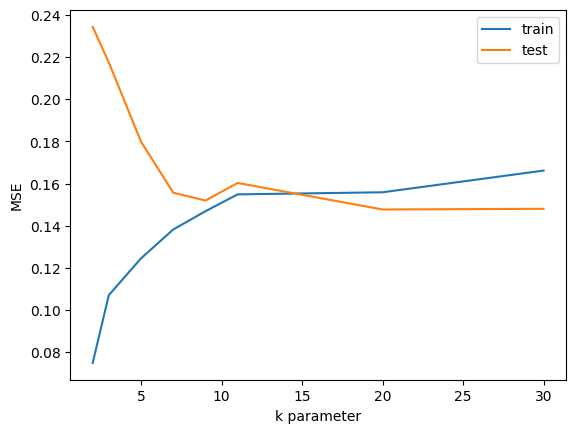

In [24]:
from sklearn import neighbors

# create the list of K's
KNN_k = [2, 3, 5, 7, 9, 11, 20, 30]

KNN_list = []
y_fit_list = []
mse_train_list = []
mse_test_list = []

for i in KNN_k:
  knn_model = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn_model.fit(x_train.reshape(-1, 1), y_train)
  est_train_y = knn_model.predict(x_train.reshape(-1, 1))
  # predict y with KNN and the test data - do not forget to reshape the data
  est_test_y = knn_model.predict(x_test.reshape(-1,1))
  y_fit_list.append(est_train_y)
  mse_train_list = np.append(mse_train_list, MSE(y_train, est_train_y))
  # append the test MSE to the test MSE vector similar to the above
  mse_test_list = np.append(mse_test_list, MSE(y_test, est_test_y))

print(f"Train MSE: {mse_train_list.round(2)}")
print(f"Test MSE: {mse_test_list.round(2)}")

plt.plot(x_train, y_train, '.', label = 'real data')
for i in [0, 2, 4]:
  plt.plot(x_train, y_fit_list[i], '.', label = f'N = {KNN_k[i]}')

plt.legend(title="Degree of the KNN")
plt.show()

plt.plot(KNN_k , mse_train_list, '-', label = 'train')
# display the knn wit test MSE list, ':' as the line
plt.plot(KNN_k , mse_test_list, '-', label = 'test')
plt.xlabel("k parameter")
plt.ylabel("MSE")
_ = plt.legend()
plt.show()

In the cell below, explain how the choice of $k$ in K-Nearest Neighbors (KNN) regression affects model flexibility and the risk of underfitting or overfitting.

In [ ]:
print("Print explanation here")

### Polynomial fitting using sklearn polynomial feature generation


To do the polynomial approach in a `sklearn` way, we can use the `PolynomialFeatures` from `sklearn.preprocessing`. This class implements the `fit`, `fit_transform`, and `transform` methods as the classes from `preprocessin` we worked before.

To implement polynomial regression using `sklearn`, we can use the `PolynomialFeatures` class from `sklearn.preprocessing`.  
This class provides the methods `fit`, `fit_transform`, and `transform`, similar to other preprocessing tools you've used before.

It allows us to generate polynomial feature expansions of the input data, which can then be used with linear models to fit nonlinear relationships.

For example, a degree-3 polynomial expansion of a single feature $x$ produces:

$$
[1, x, x^2, x^3]
$$

The `include_bias=True` parameter (default) adds a column of ones to represent the intercept term.


In [25]:
from sklearn.preprocessing import PolynomialFeatures

We use `fit_transform` from `PolynomialFeatures` to generate polynomial features up to a specified degree.  
If the `include_bias=True` parameter is set (default), the method adds a column of ones as the first feature to account for the intercept term in the model.

Follow these steps to apply polynomial regression using `sklearn`, similar to the KNN example above:

1. **Split** the data into training and test sets.  
2. **Fit** a linear regression model on the polynomial-transformed training data and **predict** on both training and test sets.  
3. **Compute and plot** the MSE for both training and test sets as a function of the polynomial degree.  
4. **Visualize** the fitted curves for selected degrees: `poly_degrees` $\in \{4, 9, 25\}$ using different colors.  

Here, the generated polynomial features are either too small or too large numbers, therefore for higher degree of polynomials the method may fail to fit it.


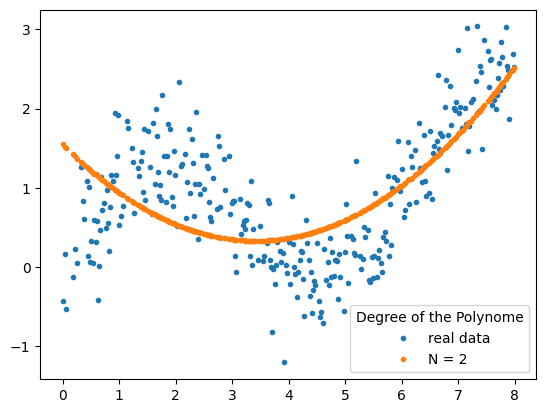

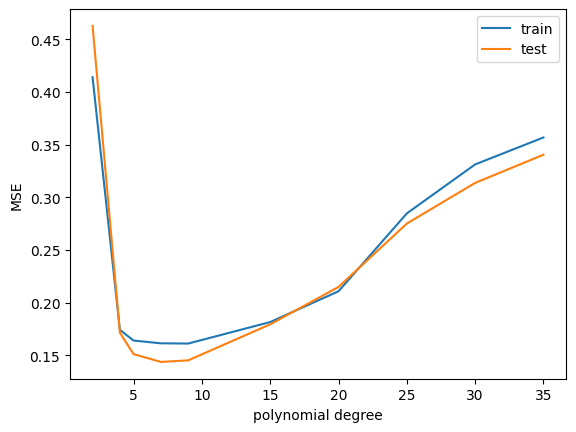

In [28]:
poly_degrees = [2,4,5,7,9,15,20,25,30,35]
poly = PolynomialFeatures(100)
X_p = poly.fit_transform(x.reshape(-1,1))

# divide the X_p and y into trainign and test set, with test_size=0.25 and random_state=0
X_p_train, X_p_test, y_train, y_test = train_test_split(X_p, y, random_state=0, test_size=0.25)

y_lr_fit_list = []

y_est_list = []
train_mse_list = []
test_mse_list = []
for i in poly_degrees:
  reg_model = LinearRegression().fit(X_p_train[:,0:(i+1)], y_train)
  y_lr_fit_list.append(reg_model.predict(X_p_train[:,0:(i+1)]))
  train_mse_list.append(MSE(y_train, reg_model.predict(X_p_train[:, 0:(i+1)])))
  # append test error
  test_mse_list.append( MSE(y_test, reg_model.predict(X_p_test[:, 0:(i+1)])))


plt.plot(x_train, y_train, '.', label = 'real data')
# add the indices of required degrees to the loop declaration
for i in [0]:
  plt.plot(x_train, y_lr_fit_list[i], '.', label = f'N = {poly_degrees[i]}')

plt.legend(title="Degree of the Polynome")
plt.show()

plt.plot(poly_degrees , train_mse_list, '-', label = 'train')
# display the regression wit test MSE list, ':' as the line
plt.plot( poly_degrees , test_mse_list, '-', label = 'test')
plt.xlabel("polynomial degree")
plt.ylabel("MSE")
_ = plt.legend()


## Object Oriented Way of Fitting Models - Optional Exercise

In this optional section, we'll implement Linear Regression and KNN models using an object-oriented approach. This helps create reusable, organized code that follows software engineering best practices.